KNN - 최근접 이웃 분류

# 생선의 길이를 사용하여 무게를 예측

In [1]:
import numpy as np

In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

## 길이와 무게를 산포도로 표현

In [3]:
import matplotlib.pyplot as plt

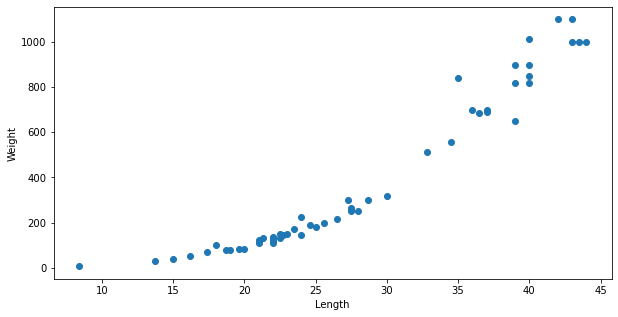

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(fish_length, fish_weight) # fish_length : Feature, fish_weight :  Target
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

## Train Set, Test Set의 분리

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input , train_target, test_target = \
    train_test_split(fish_length, fish_weight, random_state=42)

> KNN 분류에서 사용되었언 stratify는 분류문제가 아니므로 사용하지 않는다.

In [7]:
# 분리된 결과 확인
print(train_input.shape, test_input.shape)

(42,) (14,)


In [8]:
train_input # 1차원 Series로 되어있어서 1차원이다. 하지만 데이터 분석을 하려면 2차원이 되어야함

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [9]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)

In [10]:
#: 슬라이싱 사용
train_input[:10]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ]])

In [11]:
# 분리된 결과 확인
# 42행 1열이다. => 2차원
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 회귀모델 사용

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [14]:
knr.score(test_input, test_target)

0.992809406101064

> 이제 과대적합과 과소적합을 확인해야한다  
> 딱봐도 너무 잘맞추는거 같아

### 회귀모델은 분류모델처럼 예측값과 정답값을 비교할 수 없음
### 결정계수 ($R^2$) : 평균 절대값 오차율
##### $R^2$ = 1 - $(타깃 - 예측)^2$ 의 합 $\div(타깃 - 평균)^2$ 의 합

In [15]:
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

In [16]:
# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산
mea = mean_absolute_error(test_target, test_prediction)
print(mea)

19.157142857142862


> 오차율이 20%정도 나와서  
> 나의 정확도는 80% 정도 임.    
> 오차가 적은게 좋다  

## 과대적합(Overfitting)과 과소적합(Underfitting)
- score로 판단하면됨

In [17]:
# train data로 score측정
knr.score(train_input, train_target)

0.9698823289099254

In [18]:
# test data로 score측정
knr.score(test_input, test_target)

0.992809406101064

> train보다 test의 점수가 잘나왔을때에는 과소 적합이라고 한다  
> 훈련이 잘못됐을때 나오는게 과소적합  
> 보통은 train점수가 test의 점수보다 조금더 잘나온 과대적합 기준으로 한다.

### KNN의 Hyper Parameter를 조정 
- 이런상황 됐으면 knn의 값을 조정하자
- 이웃의 갯수가 default는 5, knn에서 과소에서 -> 과대적합을 하려면 이웃의 갯수를 줄여야함
- 줄여야 확률이 높아지니까

In [19]:
# 이웃의 갯수를 3으로 조정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print("train score:", knr.score(train_input, train_target))
print("test score:", knr.score(test_input, test_target))

train score: 0.9804899950518966
test score: 0.9746459963987609


In [20]:
# 이웃의 갯수를 10으로 조정
knr.n_neighbors = 10

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print("train score:", knr.score(train_input, train_target))
print("test score:", knr.score(test_input, test_target))

train score: 0.96164569026043
test score: 0.9737908255822255


In [21]:
# 이웃의 갯수를 20으로 조정
knr.n_neighbors = 20

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print("train score:", knr.score(train_input, train_target))
print("test score:", knr.score(test_input, test_target))

train score: 0.8612516394391274
test score: 0.8785331565429304


In [22]:
# 이웃의 갯수를 30으로 조정
knr.n_neighbors = 30

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print("train score:", knr.score(train_input, train_target))
print("test score:", knr.score(test_input, test_target))

train score: 0.5880379500164266
test score: 0.6042092841373093


---
# 이웃의 갯수 조절을 그래프로 확인

In [23]:
x = np.arange(5, 45).reshape(-1, 1)
x

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

K ====>  1
Train :  0.9852830341215901
Test :  0.991309195814175


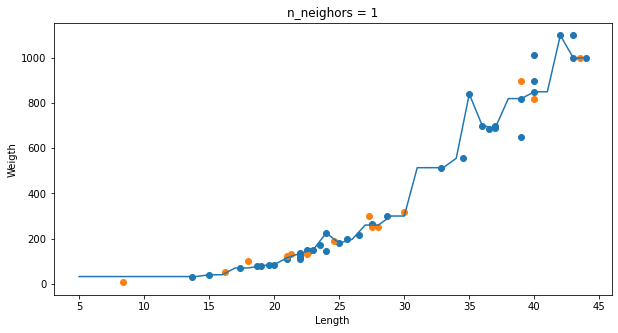

K ====>  3
Train :  0.9804899950518966
Test :  0.9746459963987609


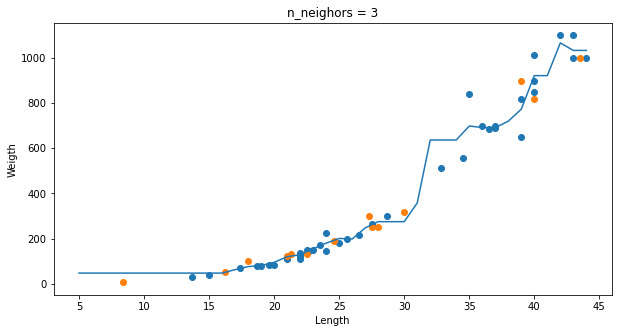

K ====>  5
Train :  0.9698823289099254
Test :  0.992809406101064


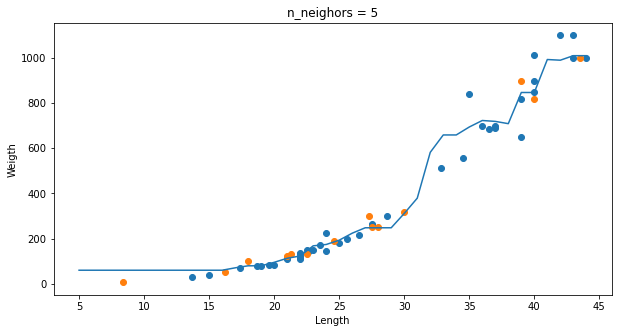

K ====>  10
Train :  0.96164569026043
Test :  0.9737908255822255


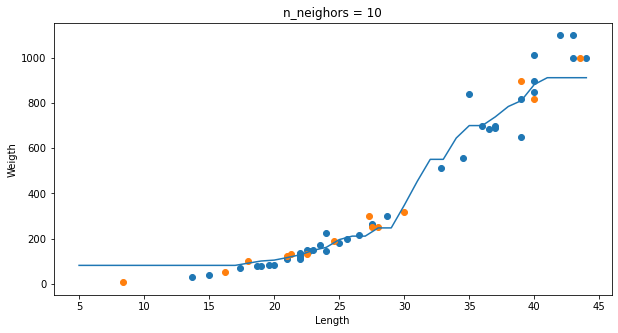

In [24]:
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 만들기(범위를 줄수 있음)
x = np.arange(5, 45).reshape(-1, 1)


# n = 1, 3, 5, 10 일때 결과 그래프를 그림
for n in [1,3,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print("K ====> ",n)
    print("Train : ", knr.score(train_input, train_target))
    print("Test : ", knr.score(test_input, test_target))


    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    # 훈련세트와 검증세트의 예측 결과 그래프 그리기
    plt.figure(figsize=(10,5))
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x, prediction)
    plt.title("n_neighors = %d"%n)
    plt.xlabel("Length")
    plt.ylabel("Weigth")
    plt.show()

> 예측값(선모양)이 어떻게 바뀌는지를 잘 봐야함  
> k =1 일때 정답 값을 따라 다니고   
> k = 3일때는 근처값을 따라 다닌다(일반화가 되어있다)  